In [1]:
# import all the libraries required for ML models
# pandas, keras, matplotlib, sklearn are some of those

# import pandas library
# load folpy
import pandas as pd
from Folpy import cop as fp
import matplotlib.pyplot as plt
%matplotlib inline

# import os, random, numpy and matplotlib libraries
import os
import random
import numpy as np
import seaborn as sn

# import sklearn libraries
from sklearn import utils
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report,f1_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif



In [2]:
# import keras library
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
#from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from keras import backend as K

import tensorflow_addons as tfa


In [3]:
# load dataset for analysis

data= pd.read_csv('student-mat.csv') 
df=data
data.head(10)

,aff_no,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,eng_mrk(10),socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12
0,1130144,GP,F,18,U,GT3,A,4,4,at_home,...,25,26,82,76,26,45.666667,Arts,67.00,91.00,67.00
1,930205,GP,F,17,U,GT3,T,1,1,at_home,...,84,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33
2,1630448,GP,F,15,U,LE3,T,1,1,at_home,...,90,68,55,69,25,63.000000,Comm&Mgmt,65.00,68.00,65.00
3,2752028,GP,F,15,U,GT3,T,4,2,health,...,20,99,88,64,43,58.333333,Arts,56.00,52.00,56.00
4,2220160,GP,F,16,U,GT3,T,3,3,other,...,49,73,90,22,99,72.000000,Comm&Mgmt,85.80,73.60,85.80
5,2132343,GP,M,16,U,LE3,T,4,3,services,...,37,14,30,98,39,43.666667,Arts,55.00,49.80,55.00
6,330018,GP,M,16,U,LE3,T,2,2,other,...,40,30,71,47,21,44.500000,Arts,46.00,49.20,46.00
7,2730281,GP,F,17,U,GT3,A,4,4,other,...,97,48,87,74,14,68.166667,Comm&Mgmt,82.00,64.00,82.00
8,1030210,GP,M,15,U,LE3,A,3,2,services,...,19,77,4,62,36,48.333333,Arts,73.00,79.00,73.00
9,3430197,GP,M,15,U,GT3,T,3,4,other,...,65,19,94,20,44,53.166667,Arts,58.00,70.00,58.00


In [4]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

o={'front':0,'middle':1,'behind':2}

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [5]:
# find correlated features

corr_features = fp.correletion()
print("No. of Correlation Features:",len(set(corr_features)))
corr_features

No. of Correlation Features: 10


{'Fjob',
 'Mjob',
 'Pstatus',
 'address',
 'aff_no',
 'famsize',
 'guardian',
 'reason',
 'school',
 'sex'}

In [6]:
# drop correlated features from analysis

df=df.drop(corr_features,axis=1)

In [7]:
# transforms lists of feature-value mappings to vectors.
# use with scikit-learn estimators
# teatures that do not occur in a sample (mapping) will have a zero value in the resulting array/matrix.

from sklearn.feature_extraction import DictVectorizer
ubic=0
qp = DictVectorizer(sparse=False)
qp.fit_transform(o)

array([[2., 0., 1.]])

In [8]:
# add new column to the dataset 
# this column is the suggested course for the student. default value is 0.
# drop rows that has missing values.

df['SugSite'] = 0
df=df.dropna(0)
df.head(20)

C:\Users\DHRUVS~1\AppData\Local\Temp/ipykernel_15556/3325081691.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df=df.dropna(0)


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite
0,18,4,4,2,2,0,yes,no,no,no,...,26,82,76,26,45.666667,Arts,67.00,91.00,67.00,0
1,17,1,1,1,2,0,no,yes,no,no,...,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33,0
2,15,1,1,1,2,3,yes,no,yes,no,...,68,55,69,25,63.000000,Comm&Mgmt,65.00,68.00,65.00,0
3,15,4,2,1,3,0,no,yes,yes,yes,...,99,88,64,43,58.333333,Arts,56.00,52.00,56.00,0
4,16,3,3,1,2,0,no,yes,yes,no,...,73,90,22,99,72.000000,Comm&Mgmt,85.80,73.60,85.80,0
5,16,4,3,1,2,0,no,yes,yes,yes,...,14,30,98,39,43.666667,Arts,55.00,49.80,55.00,0
6,16,2,2,1,2,0,no,no,no,no,...,30,71,47,21,44.500000,Arts,46.00,49.20,46.00,0
7,17,4,4,2,2,0,yes,yes,no,no,...,48,87,74,14,68.166667,Comm&Mgmt,82.00,64.00,82.00,0
8,15,3,2,1,2,0,no,yes,yes,no,...,77,4,62,36,48.333333,Arts,73.00,79.00,73.00,0
9,15,3,4,1,2,0,no,yes,yes,yes,...,19,94,20,44,53.166667,Arts,58.00,70.00,58.00,0


In [9]:
# convert yes no values to integer 1 and 0 respectively. 
# prediction is based on numeric values and not string.

df['schoolsup']=df.schoolsup.map(dict(yes=1, no=0))
df['famsup']=df.famsup.map(dict(yes=1, no=0))
df['paid']=df.paid.map(dict(yes=1, no=0))
df['activities']=df.activities.map(dict(yes=1, no=0))
df['nursery']=df.nursery.map(dict(yes=1, no=0))
df['higher']=df.higher.map(dict(yes=1, no=0))
df.rename(columns = {'romantic':'roomate'}, inplace = True)
df['roomate']=df.roomate.map(dict(yes=1, no=0))
df['internet']=df.internet.map(dict(yes=1, no=0))

In [10]:
# rename columns

df.rename(columns = {'Medu':'Act1', 'Fedu':'Act2'}, inplace = True)
df.head(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite
0,18,4,4,2,2,0,1,0,0,0,...,26,82,76,26,45.666667,Arts,67.00,91.00,67.00,0
1,17,1,1,1,2,0,0,1,0,0,...,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33,0
2,15,1,1,1,2,3,1,0,1,0,...,68,55,69,25,63.000000,Comm&Mgmt,65.00,68.00,65.00,0
3,15,4,2,1,3,0,0,1,1,1,...,99,88,64,43,58.333333,Arts,56.00,52.00,56.00,0
4,16,3,3,1,2,0,0,1,1,0,...,73,90,22,99,72.000000,Comm&Mgmt,85.80,73.60,85.80,0
5,16,4,3,1,2,0,0,1,1,1,...,14,30,98,39,43.666667,Arts,55.00,49.80,55.00,0
6,16,2,2,1,2,0,0,0,0,0,...,30,71,47,21,44.500000,Arts,46.00,49.20,46.00,0
7,17,4,4,2,2,0,1,1,0,0,...,48,87,74,14,68.166667,Comm&Mgmt,82.00,64.00,82.00,0
8,15,3,2,1,2,0,0,1,1,0,...,77,4,62,36,48.333333,Arts,73.00,79.00,73.00,0
9,15,3,4,1,2,0,0,1,1,1,...,19,94,20,44,53.166667,Arts,58.00,70.00,58.00,0


In [11]:
# setup condition for suggested new course for the student based on a cutoff value.
# here 60+ is considered same set of course and anything less that 60, model will suggest a new course

import numpy as np
# create a list of our conditions
conditions = [
    (df['G1_11F'] >=60),
    (df['G1_11F'] < 60)
    ]

# create a list of the values we want to assign for each condition
values = ['no', 'yes']

# create a new column and use np.select to assign values to it using our lists as arguments
df['SugSite'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite
0,18,4,4,2,2,0,1,0,0,0,...,26,82,76,26,45.666667,Arts,67.00,91.00,67.00,no
1,17,1,1,1,2,0,0,1,0,0,...,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33,no


In [12]:
df.head(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite
0,18,4,4,2,2,0,1,0,0,0,...,26,82,76,26,45.666667,Arts,67.00,91.00,67.00,no
1,17,1,1,1,2,0,0,1,0,0,...,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33,no
2,15,1,1,1,2,3,1,0,1,0,...,68,55,69,25,63.000000,Comm&Mgmt,65.00,68.00,65.00,no
3,15,4,2,1,3,0,0,1,1,1,...,99,88,64,43,58.333333,Arts,56.00,52.00,56.00,yes
4,16,3,3,1,2,0,0,1,1,0,...,73,90,22,99,72.000000,Comm&Mgmt,85.80,73.60,85.80,no
5,16,4,3,1,2,0,0,1,1,1,...,14,30,98,39,43.666667,Arts,55.00,49.80,55.00,yes
6,16,2,2,1,2,0,0,0,0,0,...,30,71,47,21,44.500000,Arts,46.00,49.20,46.00,yes
7,17,4,4,2,2,0,1,1,0,0,...,48,87,74,14,68.166667,Comm&Mgmt,82.00,64.00,82.00,no
8,15,3,2,1,2,0,0,1,1,0,...,77,4,62,36,48.333333,Arts,73.00,79.00,73.00,no
9,15,3,4,1,2,0,0,1,1,1,...,19,94,20,44,53.166667,Arts,58.00,70.00,58.00,yes


In [13]:
# convert yes no to 1 0 respectively

df['SugSite']=df.SugSite.map(dict(yes=1, no=0))
df.head(2)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite
0,18,4,4,2,2,0,1,0,0,0,...,26,82,76,26,45.666667,Arts,67.00,91.00,67.00,0
1,17,1,1,1,2,0,0,1,0,0,...,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33,0


In [14]:
df.head(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,socil_mrk(10),sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite
0,18,4,4,2,2,0,1,0,0,0,...,26,82,76,26,45.666667,Arts,67.00,91.00,67.00,0
1,17,1,1,1,2,0,0,1,0,0,...,65,46,94,27,60.166667,Comm&Mgmt,79.33,78.33,79.33,0
2,15,1,1,1,2,3,1,0,1,0,...,68,55,69,25,63.000000,Comm&Mgmt,65.00,68.00,65.00,0
3,15,4,2,1,3,0,0,1,1,1,...,99,88,64,43,58.333333,Arts,56.00,52.00,56.00,1
4,16,3,3,1,2,0,0,1,1,0,...,73,90,22,99,72.000000,Comm&Mgmt,85.80,73.60,85.80,0
5,16,4,3,1,2,0,0,1,1,1,...,14,30,98,39,43.666667,Arts,55.00,49.80,55.00,1
6,16,2,2,1,2,0,0,0,0,0,...,30,71,47,21,44.500000,Arts,46.00,49.20,46.00,1
7,17,4,4,2,2,0,1,1,0,0,...,48,87,74,14,68.166667,Comm&Mgmt,82.00,64.00,82.00,0
8,15,3,2,1,2,0,0,1,1,0,...,77,4,62,36,48.333333,Arts,73.00,79.00,73.00,0
9,15,3,4,1,2,0,0,1,1,1,...,19,94,20,44,53.166667,Arts,58.00,70.00,58.00,1


In [15]:
# create a new column for the new course that can be suggested to the student.

df['NewSite'] = 0


df['site_sel'].replace(to_replace=[r'Sci&Tech', r'Comm&Mgmt',r'Arts'],
           value=[2, 1, 0],
           regex=True, 
           inplace=True)
df.head(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite
0,18,4,4,2,2,0,1,0,0,0,...,82,76,26,45.666667,0,67.00,91.00,67.00,0,0
1,17,1,1,1,2,0,0,1,0,0,...,46,94,27,60.166667,1,79.33,78.33,79.33,0,0
2,15,1,1,1,2,3,1,0,1,0,...,55,69,25,63.000000,1,65.00,68.00,65.00,0,0
3,15,4,2,1,3,0,0,1,1,1,...,88,64,43,58.333333,0,56.00,52.00,56.00,1,0
4,16,3,3,1,2,0,0,1,1,0,...,90,22,99,72.000000,1,85.80,73.60,85.80,0,0
5,16,4,3,1,2,0,0,1,1,1,...,30,98,39,43.666667,0,55.00,49.80,55.00,1,0
6,16,2,2,1,2,0,0,0,0,0,...,71,47,21,44.500000,0,46.00,49.20,46.00,1,0
7,17,4,4,2,2,0,1,1,0,0,...,87,74,14,68.166667,1,82.00,64.00,82.00,0,0
8,15,3,2,1,2,0,0,1,1,0,...,4,62,36,48.333333,0,73.00,79.00,73.00,0,0
9,15,3,4,1,2,0,0,1,1,1,...,94,20,44,53.166667,0,58.00,70.00,58.00,1,0


In [16]:
# here we will consider sci&tech, arts and comm&mgmt as set of courses that student can take.
# new course is suggested based on the scient, social and maths marks

import numpy as np
p=0
values = ['Sci&Tech', 'Arts', 'Comm&Mgmt']
for i in range(len(df['SugSite'])):
    df['NewSite'].iloc[i] = df['site_sel'].iloc[i]
    if df['SugSite'].iloc[i]==1:
        # create a list of our conditions
        
        conditions = [
            (df['sci_mrk(10)'].iloc[i] >=70) & (df['socil_mrk(10)'].iloc[i] <70) & (df['math_mrk(10)'].iloc[i] <70),
            (df['socil_mrk(10)'].iloc[i] >=70) & (df['sci_mrk(10)'].iloc[i] <70) & (df['math_mrk(10)'].iloc[i] <70),
            (df['math_mrk(10)'].iloc[i] >=70) & (df['sci_mrk(10)'].iloc[i] <70) & (df['socil_mrk(10)'].iloc[i] <70)
            ]
        # create a list of the values we want to assign for each condition
        # values = ['Sci&Tech', 'Arts', 'Comm&Mgmt']
        values = [2, 0, 1]

        # create a new column and use np.select to assign values to it using our lists as arguments
        df['NewSite'].iloc[i] = np.select(conditions, values)
    #else:
        
        #df['NewSite'].iloc[i] = df['site_sel'].iloc[i]
        #print (df['site_sel'].iloc[i], df['NewSite'].iloc[i])
# display updated DataFrame
df.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite
0,18,4,4,2,2,0,1,0,0,0,...,82,76,26,45.666667,0,67.00,91.00,67.00,0,0
1,17,1,1,1,2,0,0,1,0,0,...,46,94,27,60.166667,1,79.33,78.33,79.33,0,1
2,15,1,1,1,2,3,1,0,1,0,...,55,69,25,63.000000,1,65.00,68.00,65.00,0,1
3,15,4,2,1,3,0,0,1,1,1,...,88,64,43,58.333333,0,56.00,52.00,56.00,1,0
4,16,3,3,1,2,0,0,1,1,0,...,90,22,99,72.000000,1,85.80,73.60,85.80,0,1
5,16,4,3,1,2,0,0,1,1,1,...,30,98,39,43.666667,0,55.00,49.80,55.00,1,0
6,16,2,2,1,2,0,0,0,0,0,...,71,47,21,44.500000,0,46.00,49.20,46.00,1,2
7,17,4,4,2,2,0,1,1,0,0,...,87,74,14,68.166667,1,82.00,64.00,82.00,0,1
8,15,3,2,1,2,0,0,1,1,0,...,4,62,36,48.333333,0,73.00,79.00,73.00,0,0
9,15,3,4,1,2,0,0,1,1,1,...,94,20,44,53.166667,0,58.00,70.00,58.00,1,2


In [17]:
# newsite column will have 2 for science, 1 for comm&mgmt and 0 for arts

#df['NewSite'].replace(to_replace=[r'Sci&Tech', r'Comm&Mgmt',r'Arts'],
#           value=[2, 1, 0],
#           regex=True, 
#           inplace=True)
#df.head(2)

In [18]:
df.head(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite
0,18,4,4,2,2,0,1,0,0,0,...,82,76,26,45.666667,0,67.00,91.00,67.00,0,0
1,17,1,1,1,2,0,0,1,0,0,...,46,94,27,60.166667,1,79.33,78.33,79.33,0,1
2,15,1,1,1,2,3,1,0,1,0,...,55,69,25,63.000000,1,65.00,68.00,65.00,0,1
3,15,4,2,1,3,0,0,1,1,1,...,88,64,43,58.333333,0,56.00,52.00,56.00,1,0
4,16,3,3,1,2,0,0,1,1,0,...,90,22,99,72.000000,1,85.80,73.60,85.80,0,1
5,16,4,3,1,2,0,0,1,1,1,...,30,98,39,43.666667,0,55.00,49.80,55.00,1,0
6,16,2,2,1,2,0,0,0,0,0,...,71,47,21,44.500000,0,46.00,49.20,46.00,1,2
7,17,4,4,2,2,0,1,1,0,0,...,87,74,14,68.166667,1,82.00,64.00,82.00,0,1
8,15,3,2,1,2,0,0,1,1,0,...,4,62,36,48.333333,0,73.00,79.00,73.00,0,0
9,15,3,4,1,2,0,0,1,1,1,...,94,20,44,53.166667,0,58.00,70.00,58.00,1,2


In [80]:
# create a new column for currently selected course
import numpy as np
mac=1980
# create a list of our conditions
conditions = [
    (df['G1_11F'] >=60),
    (df['G1_11F'] <60)
    ]

# create a list of the values we want to assign for each condition
values = ['Pass', 'Fail']

# create a new column and use np.select to assign values to it using our lists as arguments
df['G11Result'] = np.select(conditions, values)

# display updated DataFrame
df.head(2)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite,G11Result
0,18,4,4,2,2,0,1,0,0,0,...,76,26,45.666667,0,67.00,91.00,67.00,0,0,Pass
1,17,1,1,1,2,0,0,1,0,0,...,94,27,60.166667,1,79.33,78.33,79.33,0,1,Pass


In [20]:
df['G11Result']=df.G11Result.map(dict(Pass=1, Fail=0))

In [21]:
# G3_12 will be the target value and the rest input variables.

X = df.drop("G11Result",axis=1)
y = df["G11Result"] 

In [22]:
# separate dataset into train and test
# here the test data size is 30% of the original dataset


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, type(X_train)

((5600, 34), (2400, 34), pandas.core.frame.DataFrame)

In [23]:
X_train.columns

Index(['age', 'Act1', 'Act2', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'roomate', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'hindi_mrk(10)', 'eng_mrk(10)', 'socil_mrk(10)',
       'sci_mrk(10)', 'skt_mrk(10)', 'math_mrk(10)', 'perc(total_avg)',
       'site_sel', 'G1_11F', 'G2 _11S', 'G3_12', 'SugSite', 'NewSite'],
      dtype='object')

In [24]:
# find the variance threshold that affect and doesn't affect the output

var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [25]:
# list of consistent features and in-consistent features that affects the prediction

print("Find Consistent and Non-Consistent Features:\n",var_thres.get_support())
print("No. of Non-Consistent Features: ",len(X_train.columns[var_thres.get_support()]))

Find Consistent and Non-Consistent Features:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
No. of Non-Consistent Features:  34


In [26]:
# find features (columns) that doesnt impact the final outcome.

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))
constant_columns.append("age")
for column in constant_columns:
    print(column)

# drop the columns (feature's) that doesn't affect the final outcome.

X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

0
age


In [27]:
df.head(2)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite,G11Result
0,18,4,4,2,2,0,1,0,0,0,...,76,26,45.666667,0,67.00,91.00,67.00,0,0,1
1,17,1,1,1,2,0,0,1,0,0,...,94,27,60.166667,1,79.33,78.33,79.33,0,1,1


In [28]:
X_train

,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,sci_mrk(10),skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite
607,2,2,1,2,0,1,1,1,0,1,...,20,95,18,68.500000,1,47.00,55.00,82.0,1,0
5279,2,1,1,1,3,0,1,0,0,1,...,47,87,33,72.666667,1,47.00,73.00,69.0,1,0
6403,2,2,2,2,0,0,0,1,1,1,...,33,32,70,35.000000,1,40.00,79.00,56.0,1,1
1732,3,3,2,3,2,0,1,1,1,1,...,86,87,51,67.000000,1,40.89,45.83,61.0,1,2
5266,1,1,3,1,0,0,1,0,1,0,...,20,56,46,59.000000,1,67.00,53.00,83.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,1,1,2,0,0,0,0,1,1,...,92,31,72,60.333333,1,52.00,57.00,67.0,1,0
3264,3,4,1,2,0,0,1,1,1,1,...,90,22,99,72.000000,1,85.80,73.60,80.0,0,1
1653,3,1,1,1,0,0,0,0,1,1,...,58,76,96,66.833333,1,64.60,83.83,80.0,0,1
2607,2,1,1,1,0,0,0,0,0,1,...,68,51,11,40.166667,1,79.00,76.00,82.0,0,1


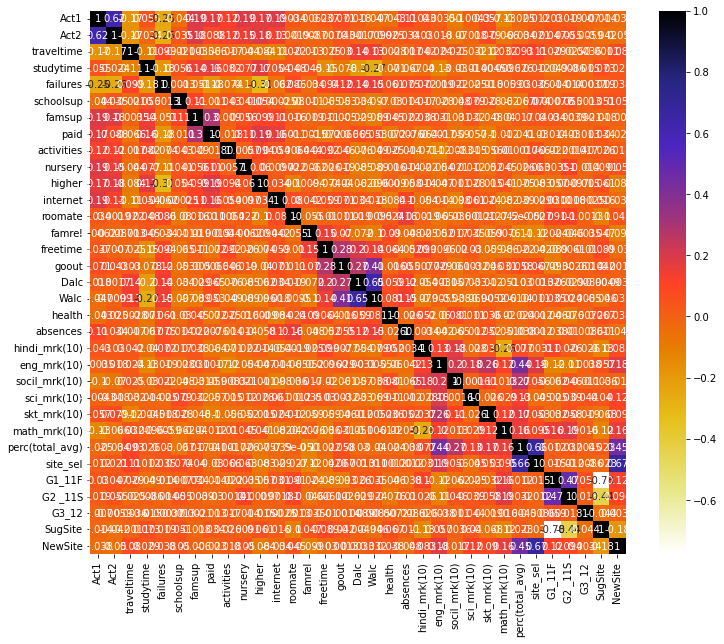

In [29]:
# create heatmap of features impact on the outcome

import seaborn as sns

seq_len,batch_size,ubic,n_epochs,n_features= 60,128,80,20,82
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
# call the correlation function to determine the correlated features.

corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features

No. of Correlation Features: 1


{'SugSite'}

In [32]:
# in the train and test dataset, drop the correlated features that has not much impact on the outcome

X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

X_train.columns

Index(['Act1', 'Act2', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'roomate', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'hindi_mrk(10)', 'eng_mrk(10)', 'socil_mrk(10)',
       'sci_mrk(10)', 'skt_mrk(10)', 'math_mrk(10)', 'perc(total_avg)',
       'site_sel', 'G1_11F', 'G2 _11S', 'G3_12', 'NewSite'],
      dtype='object')

In [33]:
print(utils.multiclass.type_of_target(y_train))

binary


In [34]:
# determine the mutual information
#mutual_info = mutual_info_classif(X_train, utils.multiclass.type_of_target(y_train.astype('int')))
mutual_info=df.describe()
mutual_info

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite,G11Result
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,16.681625,2.753500,2.522625,1.446500,2.036250,0.332625,0.131125,0.614375,0.458500,0.509375,...,56.652500,52.251125,56.967479,0.877250,66.174780,67.269519,68.259000,0.278500,0.808625,0.721500
std,1.275036,1.093109,1.086571,0.695664,0.838614,0.741657,0.337558,0.486773,0.498306,0.499943,...,25.931136,28.481226,13.399849,0.592221,11.775323,11.553169,10.958223,0.448289,0.677169,0.448289
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,34.666667,0.000000,40.000000,37.000000,40.890000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,26.000000,45.333333,1.000000,58.000000,62.000000,60.850000,0.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,62.000000,55.000000,55.833333,1.000000,65.000000,67.000000,69.000000,0.000000,1.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,76.000000,77.000000,66.166667,1.000000,76.000000,74.000000,77.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,98.000000,99.000000,85.333333,2.000000,87.000000,97.700000,87.000000,1.000000,2.000000,1.000000


In [35]:
#Evaluation
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,
           preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,
           average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels,
           preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average =
           'weighted')))

In [36]:
# function to create cnn model using keras

def rcnnpred_2d(seq_len=60, n_features=82, n_filters=(8,8,8), droprate=0.1):
    "2D-RCNNpred model"
    model = Sequential([
        Input(shape=(seq_len, n_features, 1)),
        Conv2D(n_filters[0], kernel_size=(1, n_features), activation="relu"),
        Conv2D(n_filters[1], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Conv2D(n_filters[2], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Flatten(),
        Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

In [37]:
# callbacks for cnn model

checkpoint_path = "./cp2d-{epoch}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_f1', mode="max", verbose=0,
                    save_best_only=True, save_weights_only=False, save_freq="epoch")
]

In [38]:
X_train.dtypes

Act1                 int64
Act2                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
roomate              int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
hindi_mrk(10)        int64
eng_mrk(10)          int64
socil_mrk(10)        int64
sci_mrk(10)          int64
skt_mrk(10)          int64
math_mrk(10)         int64
perc(total_avg)    float64
site_sel             int64
G1_11F             float64
G2 _11S            float64
G3_12              float64
NewSite              int64
dtype: object

In [40]:
seq_len    = 60
batch_size = 128
ubic       = ubic+100
n_epochs   = 20
n_features = 25

def f1macro(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val



#model = Sequential()
#model.add(LSTM(25,return_sequences=True,input_shape=(25,1)))
#model.add(LSTM(25,return_sequences=True, activation='relu'))
#model.add(LSTM(25))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='mean_squared_error',optimizer='adam', metrics=[f1macro])
#model.fit(X_train, y_train, epochs=n_epochs, steps_per_epoch=seq_len, validation_steps=10, verbose=1, batch_size=batch_size)

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


#model = rcnnpred_2d(60, 25, (8,8,8), 0.1)
model = Sequential()
model.add(Dense(12, input_shape=(32,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.1))

# compile the model
# model.compile(optimizer='adam', loss='mae',  metrics=['accuracy',f1_m,precision_m, recall_m])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

f1 = tfa.metrics.F1Score(num_classes=1, average='macro')

#model.compile(loss = 'categorical_crossentropy',
#                optimizer = Adam(lr=init_lr, decay=init_lr / num_epochs),
#                metrics = [Recall(name='recall') #, weighted_f1
#                           tfa.metrics.F1Score(average='macro')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),                                
                      tfa.metrics.F1Score(num_classes=1, 
                      average='macro',
                      threshold=0.5)])

# fit the model
history = model.fit(X_train, y_train, epochs=n_epochs, steps_per_epoch=60, validation_steps=10, verbose=1,callbacks=callbacks)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

#print (loss, accuracy, f1_score, precision, recall )

#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[f1macro])
#model.fit(X_train,validation_data=y_train,epochs=n_epochs, steps_per_epoch=60, validation_steps=10, verbose=1,callbacks=callbacks)


Epoch 1/20
60/60 [==============================] - 3s 4ms/step - loss: 4.8915 - binary_accuracy: 0.6318 - f1_score: 0.7660
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: 4.8218 - binary_accuracy: 0.6373 - f1_score: 0.7689
Epoch 3/20
60/60 [==============================] - 0s 5ms/step - loss: 4.8406 - binary_accuracy: 0.6364 - f1_score: 0.7687
Epoch 4/20
60/60 [==============================] - 0s 5ms/step - loss: 4.8730 - binary_accuracy: 0.6339 - f1_score: 0.7668
Epoch 5/20
60/60 [==============================] - 0s 4ms/step - loss: 4.8775 - binary_accuracy: 0.6329 - f1_score: 0.7663
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: 4.8848 - binary_accuracy: 0.6339 - f1_score: 0.7676
Epoch 7/20
60/60 [==============================] - 0s 5ms/step - loss: 4.9013 - binary_accuracy: 0.6321 - f1_score: 0.7660
Epoch 8/20
60/60 [==============================] - 0s 5ms/step - loss: 4.9382 - binary_accuracy: 0.6320 - f1_score: 0.7656
Epoch 9/

In [88]:
# predict using test dataset
p=model.predict(X_test)
p

75/75 [==============================] - 0s 3ms/step


array([[1.        ],
       [0.9843712 ],
       [0.02543372],
       ...,
       [0.9999563 ],
       [0.99999994],
       [1.        ]], dtype=float32)

In [89]:
# debug
print(utils.multiclass.type_of_target(y_test))

binary


In [90]:
p.shape

(2400, 1)

In [91]:
# generate classification report
p = (p > 0.5)
#p[:mac,0]=y_test.iloc[:mac]#y_t=(y_test > 60)
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.09      0.02      0.03       663
           1       0.72      0.94      0.81      1737

    accuracy                           0.69      2400
   macro avg       0.40      0.48      0.42      2400
weighted avg       0.54      0.69      0.60      2400



In [92]:
# display accuracy score
RCNN_acc= accuracy_score(y_test, p)
print("RCNN Accuracy: ", RCNN_acc)

RCNN Accuracy:  0.6875


In [93]:
#pre=np.argmax(p,axis=1)
#pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
# convert to numpy array

#y_t=y_t.to_numpy()
#y_t=y_t.reshape(p.shape)
#y_t.shape

(2400, 1)

In [92]:
#r=np.argmax(y_t,axis=1)
#r

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

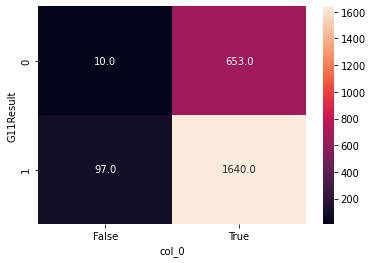

In [94]:
# heatmap using seaborn library and confusion matrix

y_predict=np.reshape(p,-1)
confusion_matrix = pd.crosstab(y_test,y_predict)
confusion_matrix
sn.heatmap(confusion_matrix, annot=True, fmt=".1f")
plt.show()

In [95]:
# use keras model class to use one current output as model input

model_feat = Model(inputs=model.input,outputs=model.output)

feat_train = model_feat.predict(X_train)
print(feat_train.shape)

feat_val = model_feat.predict(X_test)
print(feat_val.shape)

feat_test = model_feat.predict(X_test)
print(feat_test.shape)

175/175 [==============================] - 1s 3ms/step
(5600, 1)
75/75 [==============================] - 0s 3ms/step
(2400, 1)
75/75 [==============================] - 0s 3ms/step
(2400, 1)


In [96]:
# train using LVQ 3
def lvq3_train(data, kelas, a, b, max_ep, min_a, e):
    X = data.values
    y = np.array(kelas)
    c, train_idx = np.unique(y, True)
    r = c
    W = X[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])
    X = train[:, 0]
    y = train[:, 1]
    ep = 0

    while ep < max_ep and a > min_a:
        for i, x in enumerate(X):
            d = [math.sqrt(sum((w - x) ** 2)) for w in W]
            min_1 = np.argmin(d)

            min_2 = 0
            dc = float(np.amin(d))
            dr = 0
            min_2 = d.index(sorted(d)[1])
            dr = float(d[min_2])
            if c[min_1] == y[i] and c[min_1] != r[min_2]:
                W[min_1] = W[min_1] + a * (x - W[min_1])

            elif c[min_1] != r[min_2] and y[i] == r[min_2]:
                if dc != 0 and dr != 0:

                    if min((dc/dr),(dr/dc)) > (1-e) / (1+e):
                        W[min_1] = W[min_1] - a * (x - W[min_1])
                        W[min_2] = W[min_2] + a * (x - W[min_2])
            elif c[min_1] == r[min_2] and y[i] == r[min_2]:
                W[min_1] = W[min_1] + e * a * (x - W[min_1])
                W[min_2] = W[min_2] + e * a * (x- W[min_2])
        a = a * b
        ep += 1
    return W, c

In [97]:
#Test Using LVQ 3
def lvq3_test(x, W):
    
    W, c = W
    d = [math.sqrt(sum((w - x) ** 2)) for w in W]

    return c[np.argmin(d)]

In [98]:
#Get final weight from train
import math
W = lvq3_train(pd.DataFrame(feat_train),y_train, 0.3, 0.2, 100, 0.001, 0.3)
W

C:\Users\DHRUVS~1\AppData\Local\Temp/ipykernel_15556/3273536050.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])


(array([[-0.91060017],
        [ 0.95103191]]),
 array([0, 1], dtype=int64))

In [99]:
type(y_train)

pandas.core.series.Series

In [103]:
# Test and predict
predicted = []
for i in X_test.values:
    predicted.append(lvq3_test(i, W))
    
#print (predicted)
print_metrics(y_test, (np.array(predicted) > 0))# split data into train and test

Precision Score: 0.5238140625
Recall Score: 0.72375
Accuracy Score: 0.72375
F1 Score: 0.6077610587382161


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((5600, 32), (2400, 32), (5600,), (2400,))

In [105]:
#pd.DataFrame(predicted*10000)[0:][1]*100
#df.to_csv('out.csv')  
df.head(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,skt_mrk(10),math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite,G11Result
0,18,4,4,2,2,0,1,0,0,0,...,76,26,45.666667,0,67.00,91.00,67.00,0,0,Pass
1,17,1,1,1,2,0,0,1,0,0,...,94,27,60.166667,1,79.33,78.33,79.33,0,1,Pass
2,15,1,1,1,2,3,1,0,1,0,...,69,25,63.000000,1,65.00,68.00,65.00,0,1,Pass
3,15,4,2,1,3,0,0,1,1,1,...,64,43,58.333333,0,56.00,52.00,56.00,1,0,Fail
4,16,3,3,1,2,0,0,1,1,0,...,22,99,72.000000,1,85.80,73.60,85.80,0,1,Pass
5,16,4,3,1,2,0,0,1,1,1,...,98,39,43.666667,0,55.00,49.80,55.00,1,0,Fail
6,16,2,2,1,2,0,0,0,0,0,...,47,21,44.500000,0,46.00,49.20,46.00,1,2,Fail
7,17,4,4,2,2,0,1,1,0,0,...,74,14,68.166667,1,82.00,64.00,82.00,0,1,Pass
8,15,3,2,1,2,0,0,1,1,0,...,62,36,48.333333,0,73.00,79.00,73.00,0,0,Pass
9,15,3,4,1,2,0,0,1,1,1,...,20,44,53.166667,0,58.00,70.00,58.00,1,2,Fail


In [102]:
Pred12=np.array(pd.DataFrame(predicted*100).iloc[0:1,:]).flatten()
Pred12.shape

(1,)

In [106]:
df2=df[:len(X_test)]

In [116]:
df2["G12Res"]=p
df2['G12Res'].replace(to_replace="True",value="Pass").replace(to_replace="False",value="Fail")
df2.head(20)

C:\Users\DHRUVS~1\AppData\Local\Temp/ipykernel_15556/519029011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["G12Res"]=p


,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite,G11Result,G12Res
0,18,4,4,2,2,0,1,0,0,0,...,26,45.666667,0,67.00,91.00,67.00,0,0,Pass,True
1,17,1,1,1,2,0,0,1,0,0,...,27,60.166667,1,79.33,78.33,79.33,0,1,Pass,True
2,15,1,1,1,2,3,1,0,1,0,...,25,63.000000,1,65.00,68.00,65.00,0,1,Pass,False
3,15,4,2,1,3,0,0,1,1,1,...,43,58.333333,0,56.00,52.00,56.00,1,0,Fail,True
4,16,3,3,1,2,0,0,1,1,0,...,99,72.000000,1,85.80,73.60,85.80,0,1,Pass,True
5,16,4,3,1,2,0,0,1,1,1,...,39,43.666667,0,55.00,49.80,55.00,1,0,Fail,True
6,16,2,2,1,2,0,0,0,0,0,...,21,44.500000,0,46.00,49.20,46.00,1,2,Fail,True
7,17,4,4,2,2,0,1,1,0,0,...,14,68.166667,1,82.00,64.00,82.00,0,1,Pass,True
8,15,3,2,1,2,0,0,1,1,0,...,36,48.333333,0,73.00,79.00,73.00,0,0,Pass,True
9,15,3,4,1,2,0,0,1,1,1,...,44,53.166667,0,58.00,70.00,58.00,1,2,Fail,True


In [115]:
df2.tail(20)

,age,Act1,Act2,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,math_mrk(10),perc(total_avg),site_sel,G1_11F,G2 _11S,G3_12,SugSite,NewSite,G11Result,G12Res
2380,15,4,4,1,2,0,0,1,1,0,...,30,52.833333,0,58.00,61.0,69.00,1,0,Fail,True
2381,15,2,1,3,3,0,0,1,0,1,...,28,43.333333,0,69.60,68.4,81.70,0,0,Pass,True
2382,15,4,4,1,1,0,0,1,1,1,...,18,68.500000,1,47.00,55.0,63.00,1,0,Fail,True
2383,15,4,3,2,2,0,0,1,1,0,...,12,56.166667,0,77.00,87.0,84.00,0,0,Pass,True
2384,15,2,2,1,3,0,0,1,0,0,...,22,50.166667,0,62.00,47.0,70.00,0,0,Pass,True
2385,16,4,4,1,1,0,0,1,0,0,...,4,54.833333,0,65.00,75.0,83.84,0,0,Pass,True
2386,16,4,4,1,3,0,0,1,1,1,...,72,36.000000,0,63.00,66.2,62.00,0,0,Pass,True
2387,16,3,3,3,2,0,1,1,0,1,...,20,84.000000,2,55.00,67.0,59.60,1,0,Fail,True
2388,17,3,2,1,1,3,0,1,0,1,...,53,45.333333,0,63.00,66.0,66.00,0,0,Pass,True
2389,16,4,3,1,1,0,0,0,1,1,...,20,44.000000,0,60.00,67.0,84.00,0,0,Pass,True
